### Group 160 
#### Bhavesh,Sejal,Trisha,Varun
**Topic: Language of Youtube, Classification based on video descriptions**

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/trisha ghali/OneDrive/Desktop/college/YoutubeVideoDataset.csv')

In [3]:
data.head()

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...


In [4]:
data.shape

(11211, 4)

In [5]:
data.Category.value_counts()

travel blog           2200
Science&Technology    2074
Food                  1828
Art&Music             1765
manufacturing         1699
History               1645
Name: Category, dtype: int64

In [6]:
data.Title.sample(5)

3491    PVC fabric China PVC tarpaulin coated manufact...
4649                      The Shogunate: History of Japan
5480         Travel in LAOS | The BEST trip of YOUR LIFE!
8270    The next manufacturing revolution is here | Ol...
8762    How to Convince Someone That You’re Right (Eve...
Name: Title, dtype: object

In [7]:
data['Description'].sample(5)

8507     Share this video for the sake of the human rac...
2195     FREE AMAZON FBA TRAINING: https://projectlifem...
10067    Kids Art Time\nGlitter Heart Toy Camera colori...
736      I went to Southern Taiwan for the first time a...
4450     What if after the US became communist under th...
Name: Description, dtype: object

In [8]:
data.info

<bound method DataFrame.info of                                                    Title  \
0      Madagascar Street Food!!! Super RARE Malagasy ...   
1                42 Foods You Need To Eat Before You Die   
2                    Gordon Ramsay’s Top 5 Indian Dishes   
3            How To Use Chopsticks - In About A Minute 🍜   
4                           Trying Indian Food 1st Time!   
...                                                  ...   
11206  art journal | shimmer sprays, stencils, collag...   
11207                   Ar-Tea Collage * Mixed Media Art   
11208  DIY Mixed Media Art Collage Greeting Cards / M...   
11209  Art Collage Process DecoJournal using Rice Pap...   
11210  Journal Collage Process using Magazine Cut Out...   

                   Videourl   Category  \
0      /watch?v=EwBA1fOQ96c       Food   
1      /watch?v=0SPwwpruGIA       Food   
2      /watch?v=upfu5nQB2ks       Food   
3      /watch?v=xFRzzSF_6gk       Food   
4      /watch?v=K79bXtaRwcM       Foo

**Missing Values**

In [9]:
num_missing_desc = data.isnull().sum()[2]    # No. of values with msising descriptions
print('Number of missing values: ' + str(num_missing_desc))
data = data.dropna()

Number of missing values: 0


**Text Cleaning**

In [10]:
# Change to lowercase
data['Title'] = data['Title'].map(lambda x: x.lower())
data['Description'] = data['Description'].map(lambda x: x.lower())

# Remove numbers
data['Title'] = data['Title'].map(lambda x: re.sub(r'\d+', '', x))
data['Description'] = data['Description'].map(lambda x: re.sub(r'\d+', '', x))


#Removing http
data['Title'] = data['Title'].map(lambda x: re.sub(r'http\S+','',x))
data['Description'] = data['Description'].map(lambda x: re.sub(r'http\S+','',x))

#Removing https
data['Title'] = data['Title'].map(lambda x: re.sub(r'https\S+','',x))
data['Description'] = data['Description'].map(lambda x: re.sub(r'https\S+','',x))

# Remove Punctuation
data['Title']  = data['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
data['Description']  = data['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
data['Title'] = data['Title'].map(lambda x: x.strip())
data['Description'] = data['Description'].map(lambda x: x.strip())

# Tokenize into words
data['Title'] = data['Title'].map(lambda x: word_tokenize(x))
data['Description'] = data['Description'].map(lambda x: word_tokenize(x))
 
# Remove non alphabetic tokens
data['Title'] = data['Title'].map(lambda x: [word for word in x if word.isalpha()])
data['Description'] = data['Description'].map(lambda x: [word for word in x if word.isalpha()])
# filter out stop words
stop_words = set(stopwords.words('english'))
data['Title'] = data['Title'].map(lambda x: [w for w in x if not w in stop_words])
data['Description'] = data['Description'].map(lambda x: [w for w in x if not w in stop_words])

# Word Lemmatization
lem = WordNetLemmatizer()
data['Title'] = data['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
data['Description'] = data['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
data['Title'] = data['Title'].map(lambda x: ' '.join(x))
data['Description'] = data['Description'].map(lambda x: ' '.join(x))


C:\Users\TRISHA~1\AppData\Local\Temp/ipykernel_11552/1983851423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['Title'].map(lambda x: x.lower())
C:\Users\TRISHA~1\AppData\Local\Temp/ipykernel_11552/1983851423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].map(lambda x: x.lower())
C:\Users\TRISHA~1\AppData\Local\Temp/ipykernel_11552/1983851423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

C:\Users\TRISHA~1\AppData\Local\Temp/ipykernel_11552/1983851423.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
C:\Users\TRISHA~1\AppData\Local\Temp/ipykernel_11552/1983851423.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['Title'].map(lambda x: ' '.join(x))
C:\Users\TRISHA~1\AppData\Local\Temp/ipykernel_11552/1983851423.py:45: SettingWithCopyWarning: 
A value is trying to be set 

In [11]:
data.head(5)

,Title,Videourl,Category,Description
0,madagascar street food super rare malagasy vil...,/watch?v=EwBA1fOQ96c,Food,alien snail japan tour madagascar best ever me...
1,foods need eat die,/watch?v=0SPwwpruGIA,Food,ultimate musttry food bucket list burgers dip ...
2,gordon ramsay top indian dish,/watch?v=upfu5nQB2ks,Food,find best interest indian recipes channel incl...
3,use chopsticks minute,/watch?v=xFRzzSF_6gk,Food,youre likely sit restaurant set chopsticks han...
4,try indian food st time,/watch?v=K79bXtaRwcM,Food,help support sinstv shop sponsor last longer b...


# word clouds

In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install --upgrade pip

In [14]:
pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud
grouped = data.groupby('Category')


# word clouds based on description

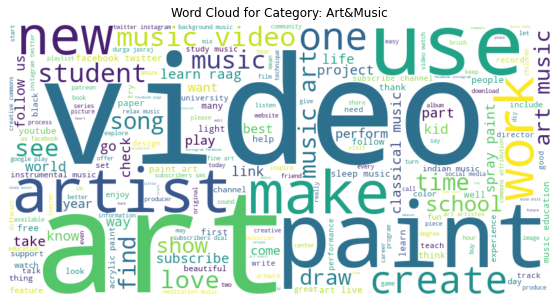

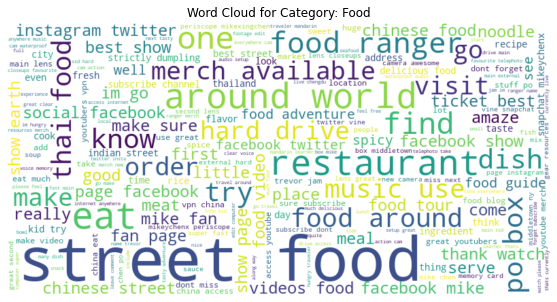

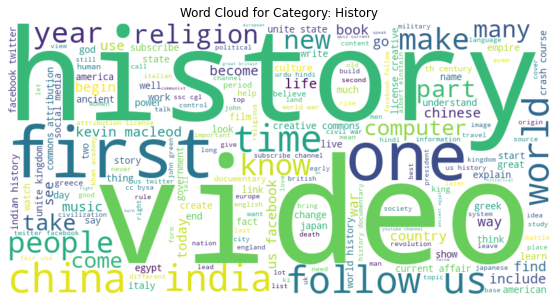

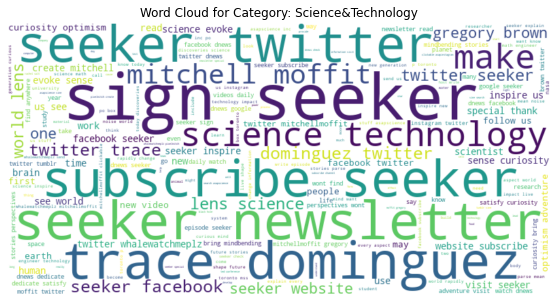

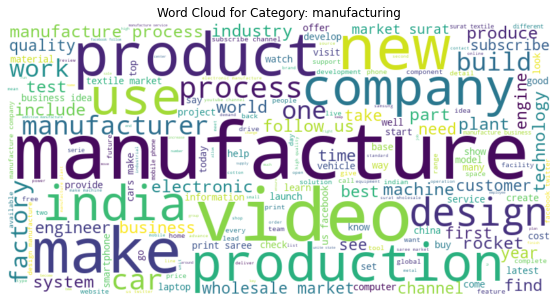

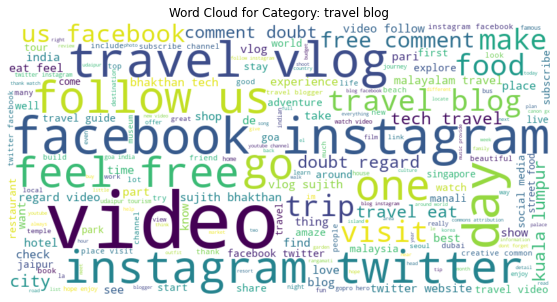

In [16]:
for cats, df in grouped:
    text = ' '.join(df['Description'])
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {cats}')
    plt.axis('off')
    plt.show()

# word clouds based on titles

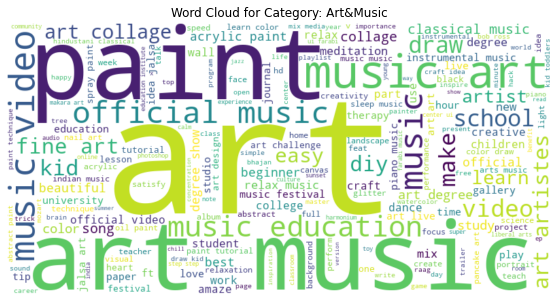

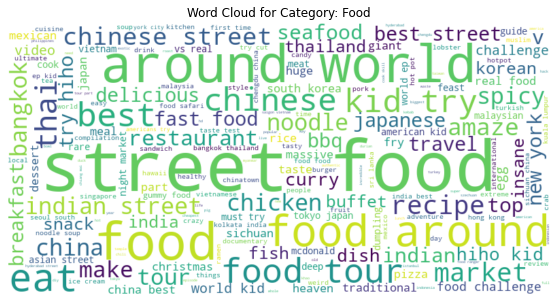

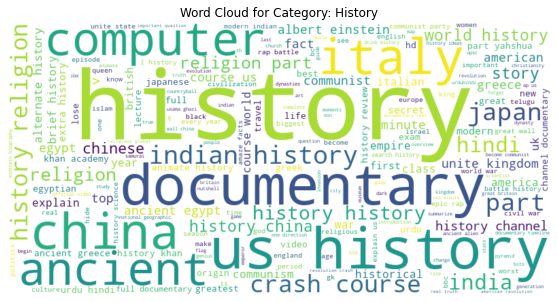

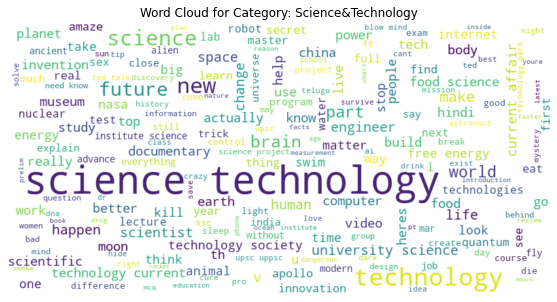

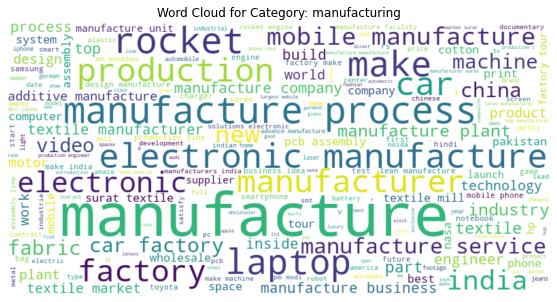

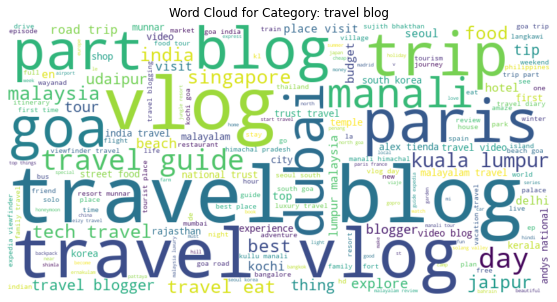

In [17]:
for cats, df in grouped:
    text = ' '.join(df['Title'])
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {cats}')
    plt.axis('off')
    plt.show()

**Label Encoding**

In [18]:
# Encode classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.Category)
data.Category = le.transform(data.Category)
data.head(5)

C:\Users\trisha ghali\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Title,Videourl,Category,Description
0,madagascar street food super rare malagasy vil...,/watch?v=EwBA1fOQ96c,1,alien snail japan tour madagascar best ever me...
1,foods need eat die,/watch?v=0SPwwpruGIA,1,ultimate musttry food bucket list burgers dip ...
2,gordon ramsay top indian dish,/watch?v=upfu5nQB2ks,1,find best interest indian recipes channel incl...
3,use chopsticks minute,/watch?v=xFRzzSF_6gk,1,youre likely sit restaurant set chopsticks han...
4,try indian food st time,/watch?v=K79bXtaRwcM,1,help support sinstv shop sponsor last longer b...


**Vectorizing text features using TF-IDF**

In [19]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = data.Category
features_title = tfidf_title.fit_transform(data.Title).toarray()
features_description = tfidf_desc.fit_transform(data.Description).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (11128, 2946)
Description Features Shape: (11128, 29474)


**Data Analysis and Exploration**

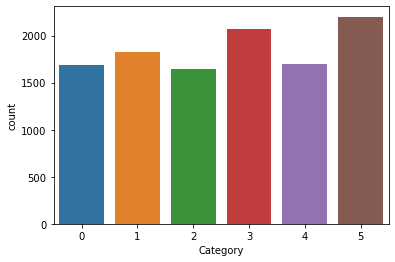

In [20]:
sns.countplot(x = 'Category',data = data)
plt.show()

Now let us see if the features are correctly extracted from the text data by checking the most important features for each class

In [21]:
# Best 5 keywords for each class using Title Feaures
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_title.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'Art&Music':
Most correlated unigrams:
------------------------------
. arts
. official
. paint
. music
. art
Most correlated bigrams:
------------------------------
. music education
. official music
. music video
. music art
. art music


# 'Food':
Most correlated unigrams:
------------------------------
. foods
. try
. world
. street
. food
Most correlated bigrams:
------------------------------
. chinese street
. kid try
. food tour
. food world
. street food


# 'History':
Most correlated unigrams:
------------------------------
. documentary
. italy
. ancient
. religion
. history
Most correlated bigrams:
------------------------------
. history china
. course history
. crash course
. history religion
. indian history


# 'Science&Technology':
Most correlated unigrams:
------------------------------
. scientists
. happen
. brain
. technology
. science
Most correlated bigrams:
------------------------------
. technology society
. current affairs
. food science
. university scienc

In [22]:
# Best 5 keywords for each class using Description Features
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_description, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_desc.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'Art&Music':
Most correlated unigrams:
------------------------------
. draw
. arts
. music
. paint
. art
Most correlated bigrams:
------------------------------
. classical music
. acrylic paint
. music education
. music art
. art music


# 'Food':
Most correlated unigrams:
------------------------------
. dish
. delicious
. mike
. street
. food
Most correlated bigrams:
------------------------------
. best earth
. ticket best
. facebook mike
. mike fan
. street food


# 'History':
Most correlated unigrams:
------------------------------
. empire
. war
. ancient
. religion
. history
Most correlated bigrams:
------------------------------
. computer history
. history channel
. world history
. crash course
. indian history


# 'Science&Technology':
Most correlated unigrams:
------------------------------
. whalewatchmeplz
. dnews
. technology
. science
. seeker
Most correlated bigrams:
------------------------------
. gregory brown
. sign seeker
. seeker newsletter
. mitchell moffit
.

### Model and Training

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
X = data.drop(columns = ['Category','Videourl'],axis =1 )
X_train, X_test, y_train, y_test = train_test_split(X, data['Category'], random_state = 0)
X_train_title_features = tfidf_title.transform(X_train['Title']).toarray()
X_train_desc_features = tfidf_desc.transform(X_train['Description']).toarray()
features = np.concatenate([X_train_title_features, X_train_desc_features], axis=1)

In [24]:
X_train.head()

,Title,Description
1065,iyasume musubi gem food waikiki hawaii,iyasume musubi wonderful place eat local hawai...
9557,power art music,collaboration leonard cheshire disability lond...
5211,travel vlog thailand bangkok phuket krabi,partner visa travel thailand share great cultu...
9421,cause charley horse avoid,charley horse worst let take look go body cram...
1425,egg fry rice street food around world hyderaba...,eggrecipes fastfood egg fry rice street food a...


In [25]:
y_train.head()

1065    1
9557    0
5211    5
9421    3
1425    1
Name: Category, dtype: int32

In [26]:
#Naive Bayes
nb = MultinomialNB().fit(features, y_train)

In [27]:
# SVM
svm = linear_model.SGDClassifier(loss='modified_huber',max_iter=1000, tol=1e-3).fit(features,y_train)

In [28]:
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=40,algorithm="SAMME").fit(features,y_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\trisha ghali\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\TRISHA~1\AppData\Local\Temp/ipykernel_11552/195125114.py", line 2, in <module>
    adaboost = AdaBoostClassifier(n_estimators=40,algorithm="SAMME").fit(features,y_train)
  File "C:\Users\trisha ghali\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 506, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\trisha ghali\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 160, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\trisha ghali\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 571, in _boost
    return self._boost_discrete(iboost, X, y, sample_weight, random_state)
  File "C:\Users\trisha ghali\anaconda3\lib\site-packages\sklearn\ensemble\_

TypeError: object of type 'NoneType' has no len()

In [29]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(features,y_train)

### Performance Evaluation

In [30]:
p = data.drop(columns = ['Category','Videourl'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(p, data['Category'], random_state = 0)
X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

### Naive Bayes

In [ ]:
pip install scikit-plot

                    precision    recall  f1-score   support

         Art&Music       0.98      0.96      0.97       421
              Food       0.96      0.93      0.95       435
           History       0.94      0.96      0.95       405
Science&Technology       0.95      0.99      0.97       549
     manufacturing       0.99      0.96      0.98       423
       travel blog       0.96      0.97      0.96       549

          accuracy                           0.96      2782
         macro avg       0.96      0.96      0.96      2782
      weighted avg       0.96      0.96      0.96      2782



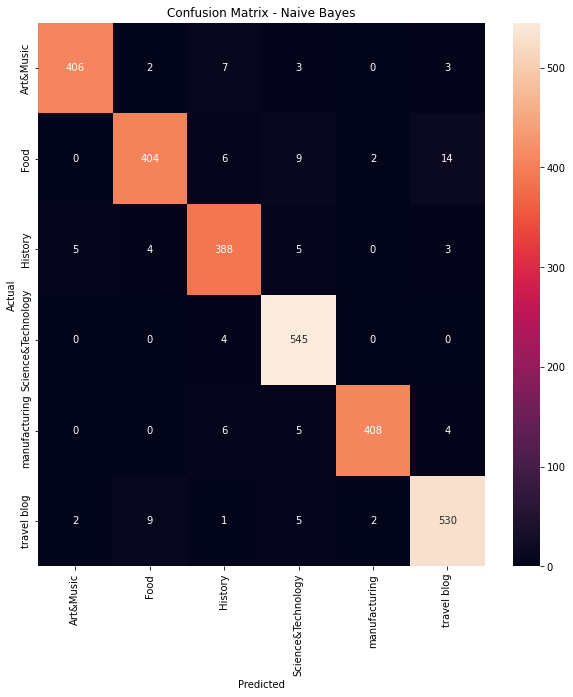

C:\Users\trisha ghali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


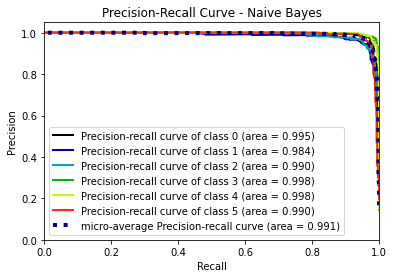

In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scikitplot as skplt


X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

# Naive Bayes
y_pred = nb.predict(test_features)
y_probas = nb.predict_proba(test_features)
targets = list(map(str, le.classes_))  # Convert target_names elements to strings

print(metrics.classification_report(y_test, y_pred, target_names=targets))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=targets, yticklabels=targets)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()


# logistic regression

                    precision    recall  f1-score   support

         Art&Music       0.99      0.99      0.99       421
              Food       0.96      0.98      0.97       435
           History       0.99      0.99      0.99       405
Science&Technology       0.99      0.99      0.99       549
     manufacturing       0.99      0.99      0.99       423
       travel blog       0.97      0.97      0.97       549

          accuracy                           0.98      2782
         macro avg       0.98      0.98      0.98      2782
      weighted avg       0.98      0.98      0.98      2782



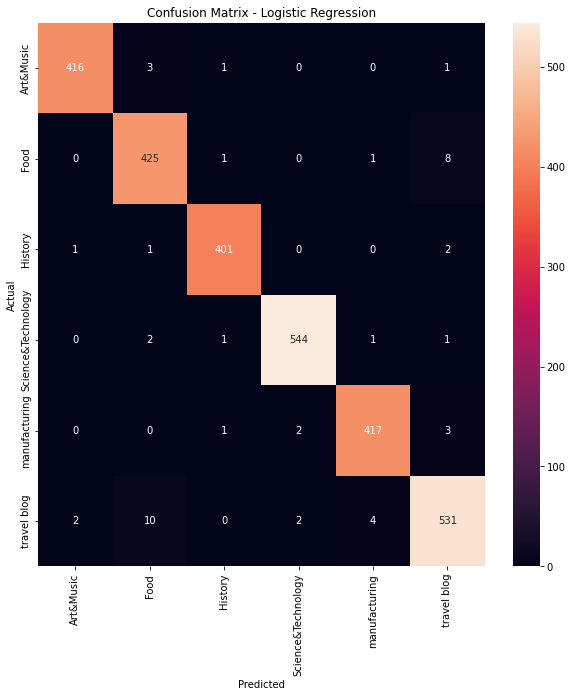

C:\Users\trisha ghali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


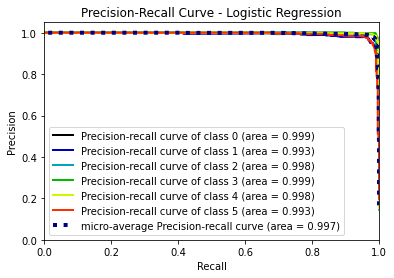

In [32]:
#Logistic Regression
y_pred = lr.predict(test_features)
y_probas = lr.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - Logistic Regression')
plt.show()

### SVM

                    precision    recall  f1-score   support

         Art&Music       0.97      1.00      0.98       421
              Food       0.97      0.97      0.97       435
           History       0.99      0.99      0.99       405
Science&Technology       0.99      0.99      0.99       549
     manufacturing       0.99      0.98      0.98       423
       travel blog       0.98      0.96      0.97       549

          accuracy                           0.98      2782
         macro avg       0.98      0.98      0.98      2782
      weighted avg       0.98      0.98      0.98      2782



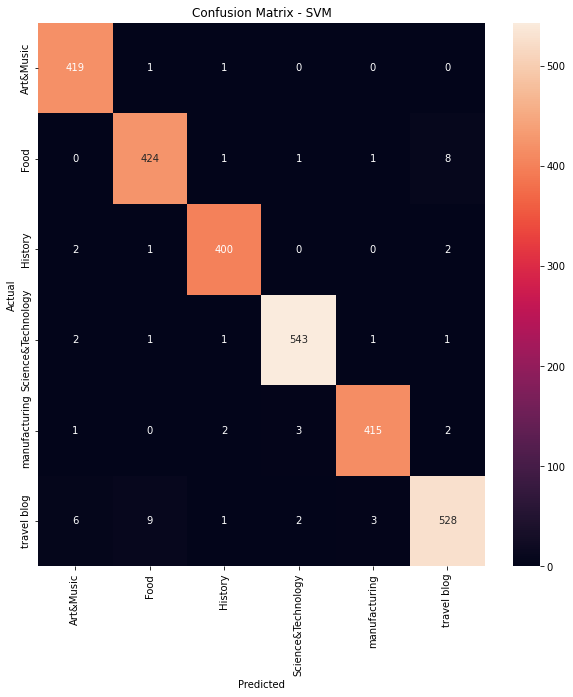

C:\Users\trisha ghali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


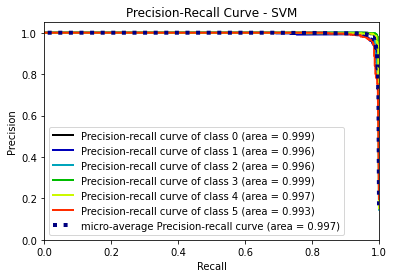

In [33]:
# SVM
y_pred = svm.predict(test_features)
y_probas = svm.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - SVM')
plt.show()

### AdaBoost

In [34]:
# Adaboost Classifier
y_pred = adaboost.predict(test_features)
y_probas = adaboost.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Adaboost Classifier')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - Adaboost Classifier')
plt.show()

NameError: name 'adaboost' is not defined

In [37]:
title= "Exploring pondicherry"
desc = "Another day, another tour. Or trip to Pondicherry was full of new and innovative dishes that were supremely tasty. We went through the streets of Pondicherry and tasted a South Indian style chaat called Verakadala Sundal- made from boiled peanuts mixed with tomatoes, onions and a few spices. This is a burst of flavours in the mouth and is a perfect snack to be chomping on the beach."
dic = {'Title':[title],'Description':[desc]}
dataa = pd.DataFrame(dic)
dataa.head()

,Title,Description
0,Exploring pondicherry,"Another day, another tour. Or trip to Pondiche..."


In [38]:
def cleaner(data):
    # Change to lowercase
    data['Title'] = data['Title'].map(lambda x: x.lower())
    data['Description'] = data['Description'].map(lambda x: x.lower())
    
    # Remove numbers
    data['Title'] = data['Title'].map(lambda x: re.sub(r'\d+', '', x))
    data['Description'] = data['Description'].map(lambda x: re.sub(r'\d+', '', x))
    
    
    #Removing http
    data['Title'] = data['Title'].map(lambda x: re.sub(r'http\S+','',x))
    data['Description'] = data['Description'].map(lambda x: re.sub(r'http\S+','',x))
    
    #Removing https
    data['Title'] = data['Title'].map(lambda x: re.sub(r'https\S+','',x))
    data['Description'] = data['Description'].map(lambda x: re.sub(r'https\S+','',x))
    
    # Remove Punctuation
    data['Title']  = data['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
    data['Description']  = data['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
    
    # Remove white spaces
    data['Title'] = data['Title'].map(lambda x: x.strip())
    data['Description'] = data['Description'].map(lambda x: x.strip())
    
    # Tokenize into words
    data['Title'] = data['Title'].map(lambda x: word_tokenize(x))
    data['Description'] = data['Description'].map(lambda x: word_tokenize(x))
     
    # Remove non alphabetic tokens
    data['Title'] = data['Title'].map(lambda x: [word for word in x if word.isalpha()])
    data['Description'] = data['Description'].map(lambda x: [word for word in x if word.isalpha()])
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    data['Title'] = data['Title'].map(lambda x: [w for w in x if not w in stop_words])
    data['Description'] = data['Description'].map(lambda x: [w for w in x if not w in stop_words])
    
    # Word Lemmatization
    lem = WordNetLemmatizer()
    data['Title'] = data['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
    data['Description'] = data['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
    
    # Turn lists back to string
    data['Title'] = data['Title'].map(lambda x: ' '.join(x))
    data['Description'] = data['Description'].map(lambda x: ' '.join(x))
    
    return data

In [39]:
def prediction_res(data):
    title_features = tfidf_title.transform(data['Title']).toarray()
    desc_features = tfidf_desc.transform(data['Description']).toarray()
    res_features = np.concatenate([title_features,desc_features],axis = 1)
    return res_features

In [40]:
res_features = prediction_res(cleaner(dataa))
lr.predict(res_features)

array([5])

In [41]:
import pickle
pickle.dump(lr,open("model.pkl","wb"))
pickle.dump(cleaner,open("modelcleaner.pkl","wb"))
pickle.dump(prediction_res,open("pred.pkl","wb"))
